In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mba_data = pd.read_csv("MBA.csv")
mba_data.head()
## gpa distribution = normal
## GMAT distribution = normal
# numerical = gpa, gmat, work_exp
# categorical =  gender, international, major, race, work_industry, admission
# race and admission are missing a ton of values
 


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [4]:
mba_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [20]:
# race and admission are missing a ton of values
# all blanks in admission could be filled with Not_Admit
# can drop race column 
#"race", axis = 1, inplace = True)
mba_data.fillna(axis = 1, value = 'Non-Admit')

# To replace NaN values in the entire DataFrame:
#mba_data = mba_data.fillna(value='Non-Admit')

# To replace NaN values in just the 'admission' column:
mba_data['admission'] = mba_data['admission'].fillna(value='Non-Admit')

print(mba_data['admission'].unique())
print(mba_data['admission'].value_counts())


['Admit' 'Non-Admit' 'Waitlist']
admission
Non-Admit    5194
Admit         900
Waitlist      100
Name: count, dtype: int64


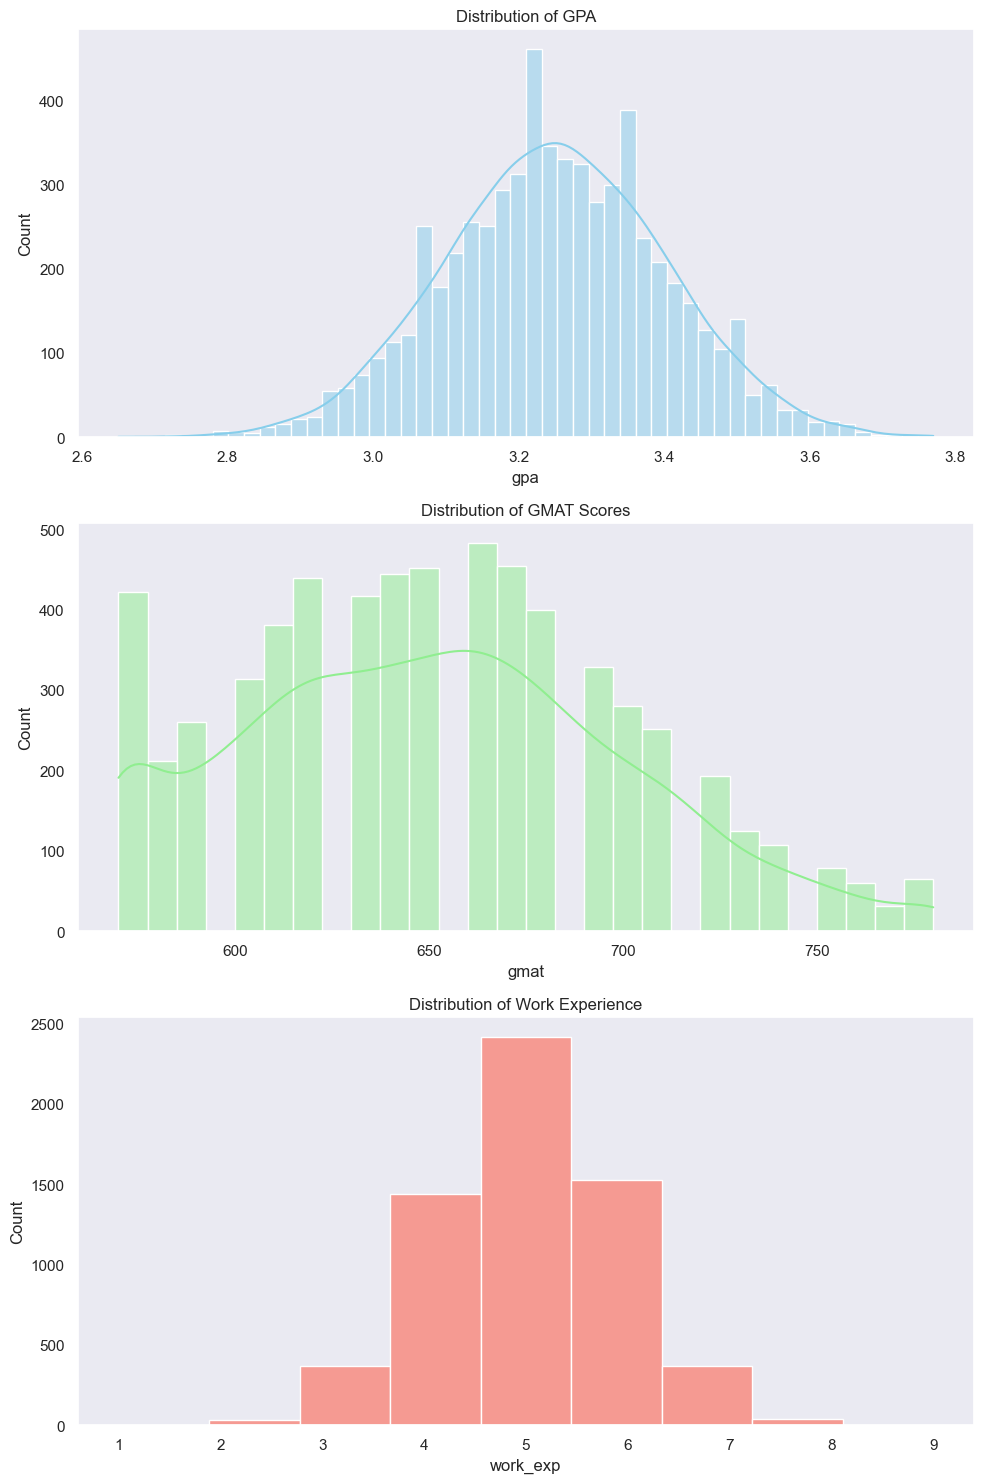

In [11]:
sns.set(style = "dark")
fig, ax = plt.subplots(3, 1, figsize = (10,15))


# GPA distribution
sns.histplot(mba_data['gpa'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of GPA')

# GMAT distribution
sns.histplot(mba_data['gmat'], kde=True, ax=ax[1], color='lightgreen')
ax[1].set_title('Distribution of GMAT Scores')

# Work Experience distribution
sns.histplot(mba_data['work_exp'], bins=int(mba_data['work_exp'].max()), kde=False, ax=ax[2], color='salmon')
ax[2].set_title('Distribution of Work Experience')

plt.tight_layout()
plt.show()




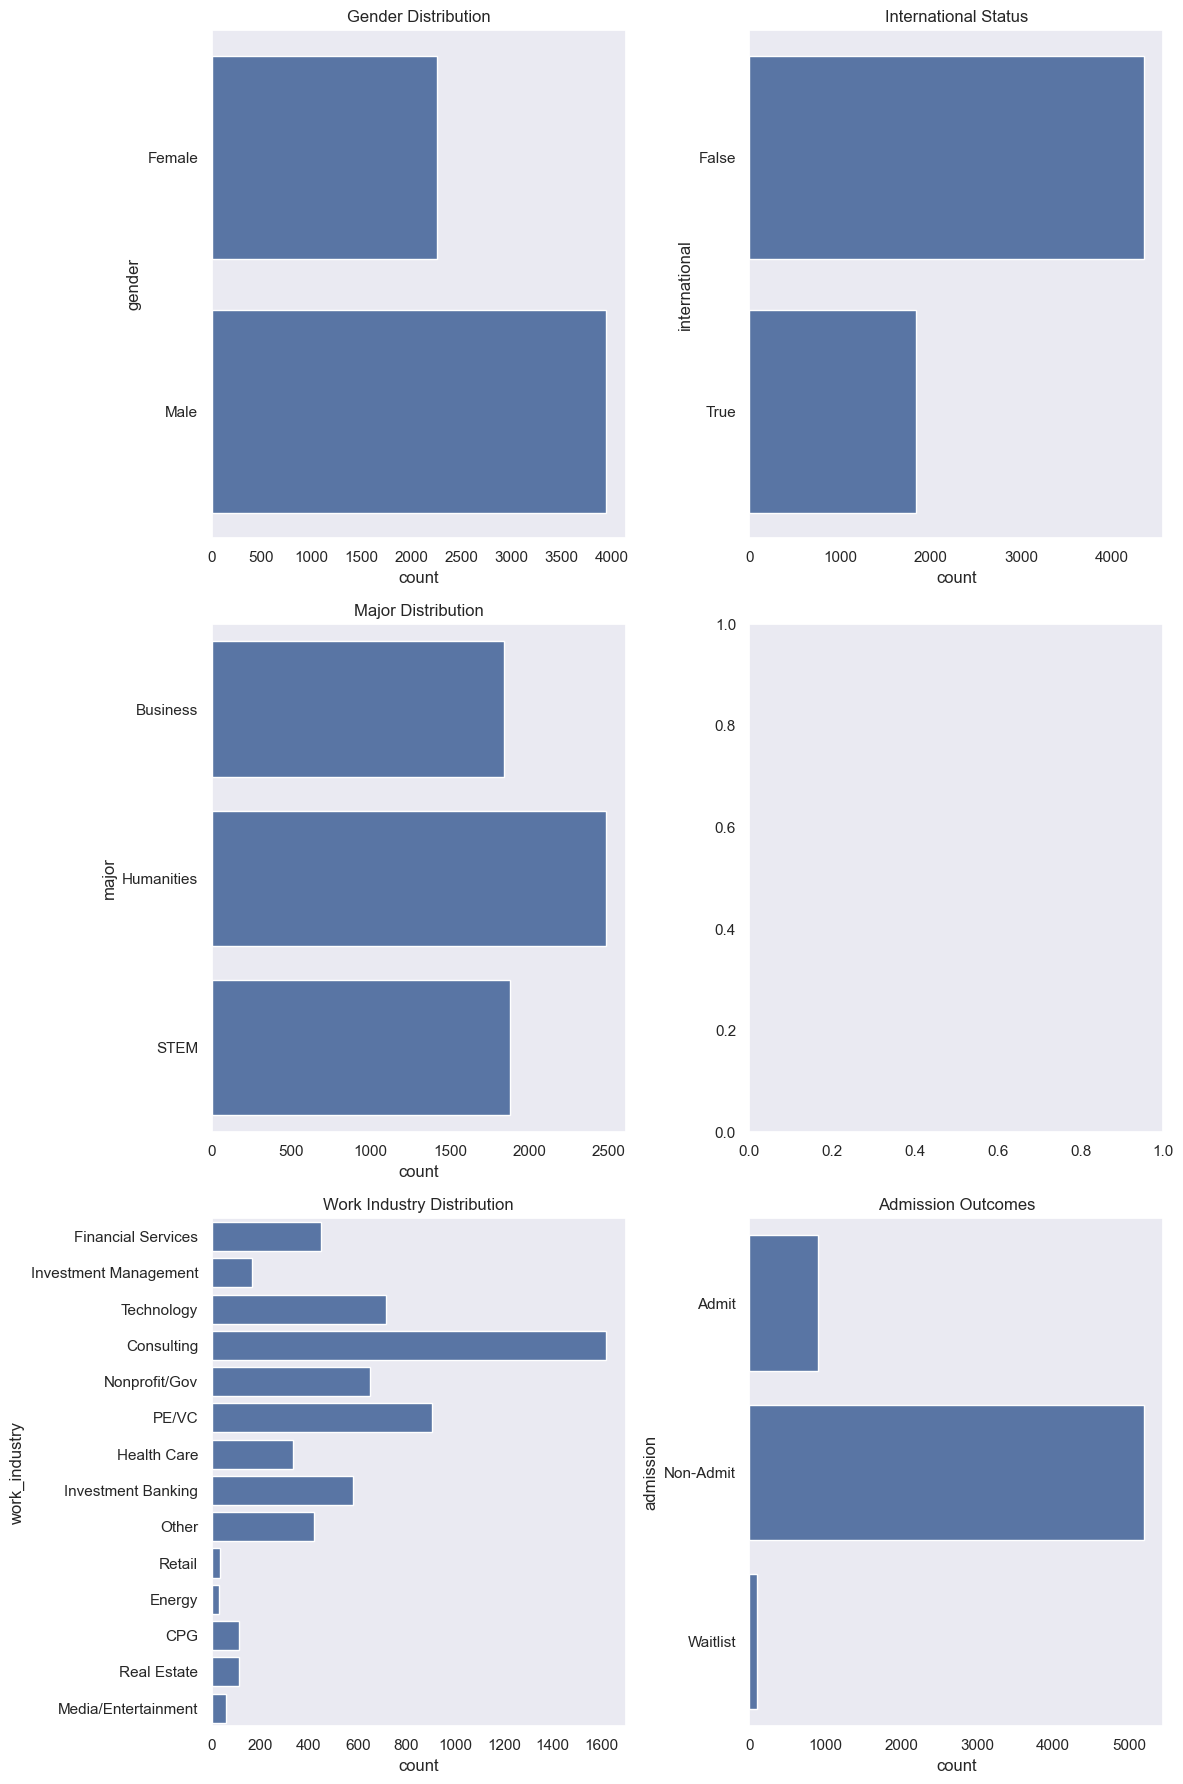

In [21]:
# Plot distributions of categorical variables
fig, ax = plt.subplots(3, 2, figsize=(12, 18))
sns.countplot(y='gender', data=mba_data, ax=ax[0, 0])
ax[0, 0].set_title('Gender Distribution')

sns.countplot(y='international', data=mba_data, ax=ax[0, 1])
ax[0, 1].set_title('International Status')

sns.countplot(y='major', data=mba_data, ax=ax[1, 0])
ax[1, 0].set_title('Major Distribution')


sns.countplot(y='work_industry', data=mba_data, ax=ax[2, 0])
ax[2, 0].set_title('Work Industry Distribution')

sns.countplot(y='admission', data=mba_data, ax=ax[2, 1])
ax[2, 1].set_title('Admission Outcomes')

plt.tight_layout()
